In [ ]:
from google.colab import files
import pandas as pd
import warnings
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
warnings.filterwarnings('ignore')

In [ ]:
uploaded = files.upload()
filename = next(iter(uploaded))

Saving golf_df.csv to golf_df.csv


In [ ]:
golf_df = pd.read_csv(filename)

In [ ]:
golf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Outlook      14 non-null     object
 1   Temperature  14 non-null     object
 2   Humidity     14 non-null     object
 3   Windy        14 non-null     bool  
 4   Play         14 non-null     object
dtypes: bool(1), object(4)
memory usage: 594.0+ bytes


In [ ]:
golf_df

,Outlook,Temperature,Humidity,Windy,Play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


In [ ]:
X = golf_df.drop(['Play'], axis=1)
y = golf_df.Play

In [ ]:
X

,Outlook,Temperature,Humidity,Windy
0,sunny,hot,high,False
1,sunny,hot,high,True
2,overcast,hot,high,False
3,rainy,mild,high,False
4,rainy,cool,normal,False
5,rainy,cool,normal,True
6,overcast,cool,normal,True
7,sunny,mild,high,False
8,sunny,cool,normal,False
9,rainy,mild,normal,False


In [ ]:
y

,Play
0,no
1,no
2,yes
3,yes
4,yes
5,no
6,yes
7,no
8,yes
9,yes


### One hot Encoding

In [ ]:
one_hot_data = pd.get_dummies(X)
one_hot_data = one_hot_data.astype(int)
one_hot_data

,Windy,Outlook_overcast,Outlook_rainy,Outlook_sunny,Temperature_cool,Temperature_hot,Temperature_mild,Humidity_high,Humidity_normal
0,0,0,0,1,0,1,0,1,0
1,1,0,0,1,0,1,0,1,0
2,0,1,0,0,0,1,0,1,0
3,0,0,1,0,0,0,1,1,0
4,0,0,1,0,1,0,0,0,1
5,1,0,1,0,1,0,0,0,1
6,1,1,0,0,1,0,0,0,1
7,0,0,0,1,0,0,1,1,0
8,0,0,0,1,1,0,0,0,1
9,0,0,1,0,0,0,1,0,1


### Label Encoding

In [ ]:
# le = LabelEncoder()

In [ ]:
# golf_df['Outlook'] = le.fit_transform(golf_df['Outlook'])
# golf_df['Temperature'] = le.fit_transform(golf_df['Temperature'])
# golf_df['Humidity'] = le.fit_transform(golf_df['Humidity'])
# golf_df['Windy'] = le.fit_transform(golf_df['Windy'])
# golf_df['Play'] = le.fit_transform(golf_df['Play'])

In [ ]:
# X = golf_df.drop(['Play'], axis=1)
# y = golf_df['Play']

In [ ]:
# X

In [ ]:
# y

In [ ]:
clf = DecisionTreeClassifier()
clf

DecisionTreeClassifier()

In [ ]:
clf_train = clf.fit(one_hot_data, y)
# clf_train = clf.fit(X, y)

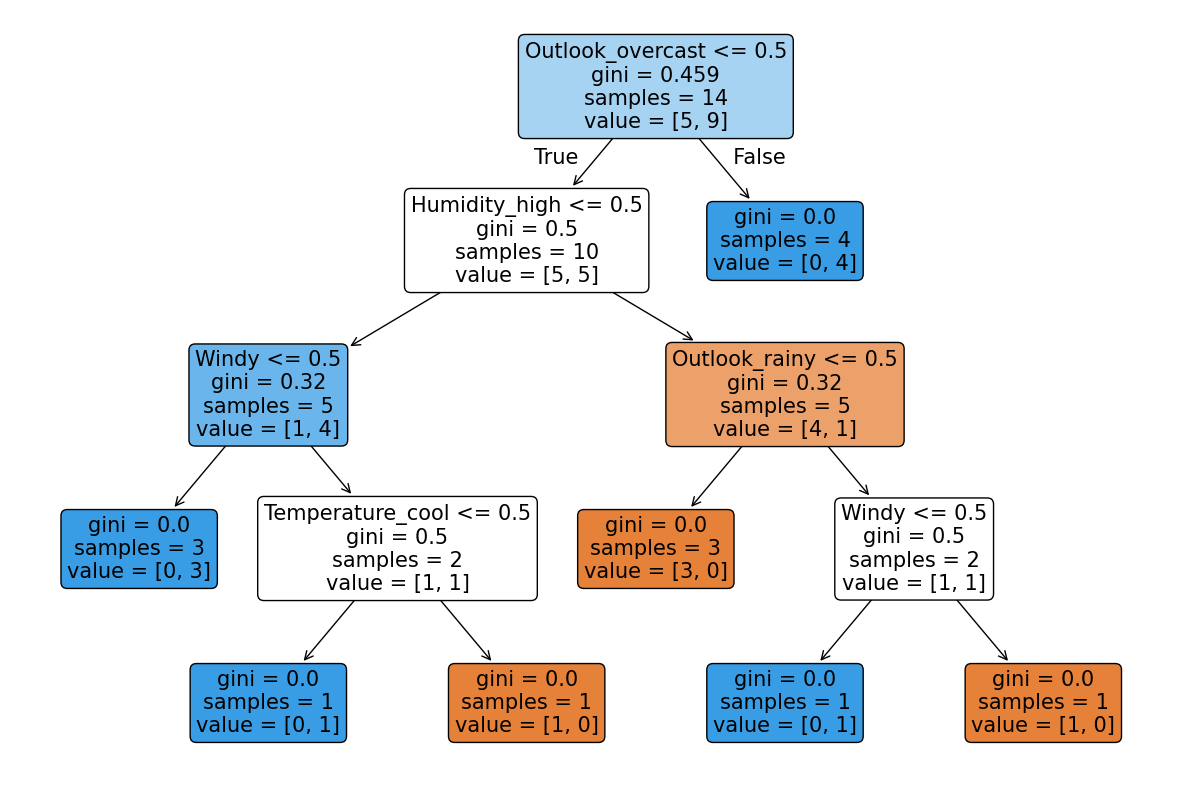

In [ ]:
plt.figure(figsize=(15, 10))
plot_tree(clf_train, filled=True, rounded=True, fontsize=15, feature_names=one_hot_data.columns)
plt.savefig('out_playgolf.pdf')

### Predict

Outlook = Sunny, Temperature = hot, Humidity = normal, Windy = false

In [ ]:
prediction = clf_train.predict([[0, 0, 1, 0, 1, 0, 0, 1, 0]])
prediction

array(['yes'], dtype=object)

### Splitting into training and testing dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(one_hot_data, y, test_size=0.3)

In [ ]:
clf = clf.fit(X_train, y_train)
clf

DecisionTreeClassifier()

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.4

### Confusion Matrix

In [ ]:
cfm = confusion_matrix(y_test, y_pred)

In [ ]:
cfm

array([[1, 0],
       [3, 1]])

In [ ]:
tn, fp, fn, tp = cfm.ravel()

In [ ]:
tn

1

### Accuracy

The accuracy of a model is the ratio of the correctly predicted instances (both true positives and true negatives) to the total number of instances.

$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$

Where:
- \(TP\) = True Positives
- \(TN\) = True Negatives
- \(FP\) = False Positives
- \(FN\) = False Negatives

In [ ]:
accuracy = (tp + tn) / (tn + fp + fn + tp)
accuracy

0.4

Function from sklearn

In [ ]:
accuracy_score(y_test, y_pred)

0.4

### Precision Score

Precision is the ratio of correctly predicted positive observations to the total predicted positives.

$
\text{Precision} = \frac{TP}{TP + FP}
$

Where:
- \(TP\) = True Positives
- \(FP\) = False Positives

In [ ]:
precision = tp / (tp + fp)
print(f"Calculated: {precision}")
print(f"Computed: {precision_score(y_test, y_pred, average=None)}")

Calculated: 1.0
Computed: [0.25 1.  ]


### Recall (Sensitivity or True Positive Rate)

Recall is the ratio of correctly predicted positive observations to all the actual positives.

$
\text{Recall} = \frac{TP}{TP + FN}
$

Where:
- \(TP\) = True Positives
- \(FN\) = False Negatives

In [ ]:
recall = tp / (tp + fn)
print(f"Calculated: {recall}")
print(f"Computed: {recall_score(y_test, y_pred, average=None)}")

Calculated: 0.25
Computed: [1.   0.25]


### F1-Score

The F1-score is the harmonic mean of precision and recall. It is a balance between precision and recall.

$
F1\text{-Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
$

In [ ]:
f1 = 2 * (precision * recall) / (precision + recall)
print(f"Calculated: {f1}")
print(f"Computed: {f1_score(y_test, y_pred, average=None)}")

Calculated: 0.4
Computed: [0.4 0.4]


In [ ]:
fpr = fp / (tn + fp)
print(f"Calculated: {fpr}")
# print(f"Computed: {roc_auc_score(y_test, y_pred, average=None)}")

Calculated: 0.0


### Interview Question: What is classification report?

In [ ]:
print(classification_report(y_test, y_pred, target_names = ['0', '1']))

              precision    recall  f1-score   support

           0       0.25      1.00      0.40         1
           1       1.00      0.25      0.40         4

    accuracy                           0.40         5
   macro avg       0.62      0.62      0.40         5
weighted avg       0.85      0.40      0.40         5

